### Simple Linear Regression Model

In [10]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


### Importing the Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2.extras

### Database Connection

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                                  user = "postgres",
                                                  password = "sultanmahmud22",
                                                  host = "127.0.0.1",
                                                  port= "5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection

In [3]:
con = PostgresConnection().getConnection()

Successfully connected to the database


### Sql Query to get data

In [4]:
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"WHERE tim.month = 12 " \
"GROUP BY s.division "\
"ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()
records

[('BARISAL', Decimal('638101.00')),
 ('CHITTAGONG', Decimal('1665138.00')),
 ('DHAKA', Decimal('3440676.25')),
 ('KHULNA', Decimal('952049.75')),
 ('RAJSHAHI', Decimal('1041201.25')),
 ('RANGPUR', Decimal('721057.50')),
 ('SYLHET', Decimal('465256.75'))]

In [5]:
df = pd.DataFrame(list(records), columns = ['Division', 'Sales'])
df

,Division,Sales
0,BARISAL,638101.00
1,CHITTAGONG,1665138.00
2,DHAKA,3440676.25
3,KHULNA,952049.75
4,RAJSHAHI,1041201.25
5,RANGPUR,721057.50
6,SYLHET,465256.75


### Importing the dataset

In [6]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

In [7]:
X

array([['BARISAL'],
       ['CHITTAGONG'],
       ['DHAKA'],
       ['KHULNA'],
       ['RAJSHAHI'],
       ['RANGPUR'],
       ['SYLHET']], dtype=object)

In [8]:
Y

array([Decimal('638101.00'), Decimal('1665138.00'), Decimal('3440676.25'),
       Decimal('952049.75'), Decimal('1041201.25'), Decimal('721057.50'),
       Decimal('465256.75')], dtype=object)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

### ...................................................................District Data................................................................................

In [12]:
cur = con.cursor()
select_stmt = "SELECT tim.month,t.total_price, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"GROUP BY tim.month, t.total_price "\
"ORDER BY tim.month "
cur.execute(select_stmt)
records = cur.fetchall()
records

[(1, Decimal('6.0'), Decimal('408.0')),
 (1, Decimal('6.75'), Decimal('4070.25')),
 (1, Decimal('7.5'), Decimal('240.0')),
 (1, Decimal('8.0'), Decimal('1824.0')),
 (1, Decimal('9.0'), Decimal('873.0')),
 (1, Decimal('10.0'), Decimal('940.0')),
 (1, Decimal('11.0'), Decimal('990.0')),
 (1, Decimal('11.5'), Decimal('1000.5')),
 (1, Decimal('12.0'), Decimal('4968.0')),
 (1, Decimal('12.5'), Decimal('937.5')),
 (1, Decimal('13.0'), Decimal('3562.0')),
 (1, Decimal('13.5'), Decimal('8680.5')),
 (1, Decimal('14.0'), Decimal('8652.0')),
 (1, Decimal('15.0'), Decimal('13500.0')),
 (1, Decimal('15.5'), Decimal('403.0')),
 (1, Decimal('16.0'), Decimal('16128.0')),
 (1, Decimal('16.25'), Decimal('4566.25')),
 (1, Decimal('16.5'), Decimal('1105.5')),
 (1, Decimal('17.0'), Decimal('9639.0')),
 (1, Decimal('17.5'), Decimal('1470.0')),
 (1, Decimal('18.0'), Decimal('7866.0')),
 (1, Decimal('19.0'), Decimal('3914.0')),
 (1, Decimal('19.5'), Decimal('1579.5')),
 (1, Decimal('20.0'), Decimal('9060.0'))

In [13]:
df = pd.DataFrame(list(records), columns = ['Division', 'Sales', 'Total Sales'])
df

,Division,Sales,Total Sales
0,1,6.0,408.0
1,1,6.75,4070.25
2,1,7.5,240.0
3,1,8.0,1824.0
4,1,9.0,873.0
...,...,...,...
3415,12,528.0,17424.0
3416,12,530.0,30740.0
3417,12,550.0,15950.0
3418,12,583.0,38478.0


In [14]:
X = df.iloc[:, :-2].values
Y = df.iloc[:, 2].values
X

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [12],
       [12],
       [12]], dtype=int64)

In [15]:
Y

array([Decimal('408.0'), Decimal('4070.25'), Decimal('240.0'), ...,
       Decimal('15950.0'), Decimal('38478.0'), Decimal('18755.0')],
      dtype=object)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

### Fitting Simple Linear Regression to the Training set

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
y_pred

array([30694.39206931, 32057.47835215, 32057.47835215, ...,
       30524.00628395, 31205.54942537, 31546.32099608])

### Visualising the Training dataset  result

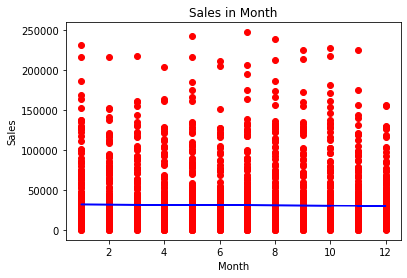

In [20]:
plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Sales in Month")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

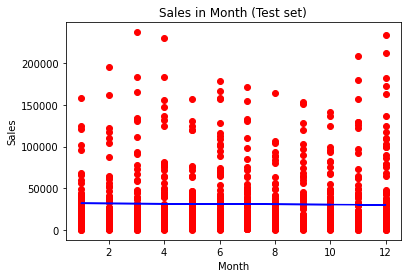

In [21]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Sales in Month (Test set)")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

### Multiple variable with DUMMY Variable

In [62]:
cur = con.cursor()
select_stmt = "SELECT  tim.year, tim.month, it.item_name, SUM(t.total_price)" \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.item_dim it on it.item_key = t.item_key " \
"GROUP BY CUBE(tim.year, tim.month, it.item_name) "\
"ORDER BY tim.year, tim.month, it.item_name "
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['year', 'month', 'item_name', 'sales'])
df = df.dropna()
#df['Sales'] = df['Sales'].astype('float64')
df['year'] = df['year'].astype('int64')
df.head()

,year,month,item_name,sales
0,2014,1.0,100% Juice Box Variety 6.75 oz,1980.0
1,2014,1.0,A&W Root Beer - 12 oz cans,1518.0
2,2014,1.0,A&W Root Beer Diet - 12 oz cans,627.75
3,2014,1.0,Advil 2 pill packets,1610.0
4,2014,1.0,All Purpose Cleaner 409 Spray,1350.0


In [63]:
X = X.iloc[:, :-1].values
X

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Nayan\Desktop\myenv\lib\site-packages\ipykernel\kernelbase.py", line 461, in dispatch_queue
    await self.process_one()
  File "C:\Users\Nayan\Desktop\myenv\lib\site-packages\ipykernel\kernelbase.py", line 450, in process_one
    await dispatch(*args)
TypeError: object NoneType can't be used in 'await' expression

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Nayan\AppData\Local\Programs\Python\Python310\lib\logging\__init__.py", line 1101, in emit
    stream.write(msg + self.terminator)
OSError: [Errno 22] Invalid argument
Call stack:
  File "C:\Users\Nayan\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Nayan\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Nayan

In [59]:
X =  pd.get_dummies(df, columns=["item_name"])


In [60]:
X.head()

,year,month,sales,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,...,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack,item_name_Zoo Animal Cookies/Crackers
0,2014,1.0,1980.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,1.0,1518.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,1.0,627.75,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,1.0,1610.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,1.0,1350.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.compose import ColumnTransformer

# labelencoder_X = LabelEncoder()
# X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
# # onehotencoder = OneHotEncoder(categorical_features = [1])
# X = onehotencoder.fit_transform(X).toarray()




# labelencoder_y = LabelEncoder()
# Y = labelencoder_X.fit_transform(Y)

# ct = ColumnTransformer([("Division", OneHotEncoder(), [1])], remainder = 'passthrough')

# X = ct.fit_transform(X)
# X = X[:, 1:]